## 航空公司客户价值分析
RFM模型：最近消费时间间隔（Recency）、消费频率（Frequency）和消费金额（Monetary）

由于消费金额的局限性，用飞行里程M和折扣系数C代替消费金额；并增加客户关系程度L。LRFMC模型：客户关系长度（L）、消费时间间隔（R）、消费频率（F）、飞行里程（M）和折扣系数的平均值（C）。

- L：会员入会时间距观测窗口结束的月数；

- R：客户最近一次乘坐公司飞机距离窗口结束的月数；

- F：客户在观测窗口内乘坐公司的次数

- M：客户在观测窗口内累计的飞行里程

- C：客户在观测窗口内乘坐舱位所对应的折扣系数平均值

In [1]:
import pandas as pd
datafile = './data/air_data.csv'
resultfile = './result/explore.xls'
data = pd.read_csv(datafile, encoding='utf-8')

In [2]:
explore = data.describe().T
explore

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


In [3]:
explore['null'] = len(data) - explore['count']
explore = explore[['null', 'max', 'min']]
explore.columns = [['空值数', '最大值', '最小值']]
explore

,空值数,最大值,最小值
MEMBER_NO,0.0,62988.000000,1.00
FFP_TIER,0.0,6.000000,4.00
AGE,420.0,110.000000,6.00
FLIGHT_COUNT,0.0,213.000000,2.00
BP_SUM,0.0,505308.000000,0.00
EP_SUM_YR_1,0.0,0.000000,0.00
EP_SUM_YR_2,0.0,74460.000000,0.00
SUM_YR_1,551.0,239560.000000,0.00
SUM_YR_2,138.0,234188.000000,0.00
SEG_KM_SUM,0.0,580717.000000,368.00


In [4]:
explore.to_excel(resultfile)

In [5]:
# 数据清洗, 保留票价非空
data = data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()]

# 只保留票价非零, 或者平均折扣率为0的值
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = data['avg_discount'] == 0
data = data[index1 | index2 | index3]

In [6]:
data.to_excel('./result/cleardata.xls')

In [7]:
data = data[['LOAD_TIME','FFP_DATE','LAST_TO_END',
             'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
data

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658
5,2014/03/31,2008/02/10,79,92,294585,0.967692
6,2014/03/31,2006/03/22,1,101,287042,0.965347
7,2014/03/31,2010/04/09,3,73,287230,0.962070
8,2014/03/31,2011/06/07,6,56,321489,0.828478
9,2014/03/31,2010/07/05,15,64,375074,0.708010


#### 属性构造
- L=LOAD_TIME - FFP_DATE(观测窗口的结束时间 - 入会时间)
- R=LAST_TO_END(最后一次乘坐飞机距观测窗口结束的时长)
- F=FLIGHT_COUNT(观测窗口内的飞行次数)
- M=SEG_KM_SUM(观测窗口内的总飞行里程)
- C=AVG_DISCOUNT(平均折扣率)

In [10]:
df = pd.DataFrame()
df['L'] = ((pd.to_datetime(data['LOAD_TIME']) - pd.to_datetime(data['FFP_DATE'])).dt.days/30).round(2)
df['R'] = (data['LAST_TO_END']/30).round(2)
df['F'] = data['FLIGHT_COUNT']
df['M'] = data['SEG_KM_SUM']
df['C'] = data['avg_discount'].round(2)

In [11]:
df.describe().T[['max', 'min']].T

,L,R,F,M,C
max,114.57,24.37,213.0,580717.0,1.5
min,12.17,0.03,2.0,368.0,0.0


In [12]:
data = (df - df.mean(axis=0))/(df.std(axis=0))
data.columns = ['Z' + i for i in df.columns]
data

,ZL,ZR,ZF,ZM,ZC
0,1.435746,-0.945542,14.034510,26.762112,1.285894
1,1.307309,-0.912489,9.073559,13.127371,2.853329
2,1.328538,-0.889353,8.719206,12.653972,2.853329
3,0.658403,-0.416704,0.781685,12.541109,1.988537
4,0.385961,-0.922405,9.924008,13.899268,1.339943
5,0.887324,-0.515861,5.671765,13.170454,1.339943
6,1.701111,-0.945542,6.309601,12.812152,1.339943
7,-0.043223,-0.933973,4.325221,12.821082,1.285894
8,-0.543171,-0.917447,3.120419,14.448431,0.583250
9,-0.145831,-0.867869,3.687385,16.993791,-0.065344


In [13]:
data.to_excel('./result/zscoreddata.xlsx')

In [17]:
from sklearn.cluster import KMeans
k = 5
kmodel = KMeans(n_clusters = k, n_jobs = 4)
kmodel.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
# 查看聚类中心
kmodel.cluster_centers_

array([[ 0.05413636, -0.00294837, -0.22884398, -0.23289087,  2.18362792],
       [ 1.16107019, -0.37746281, -0.0866874 , -0.09471551, -0.15729059],
       [-0.31407344,  1.68560841, -0.57386122, -0.53668581, -0.1753762 ],
       [ 0.48302008, -0.79948458,  2.48279483,  2.42422366,  0.30947997],
       [-0.7000998 , -0.4153057 , -0.16094143, -0.16073752, -0.25434129]])

In [19]:
# 查看各样本对应的类别
kmodel.labels_

array([3, 3, 3, ..., 4, 1, 2])

In [20]:
s = pd.Series(kmodel.labels_)

In [22]:
result = pd.DataFrame()

In [27]:
result['聚类类别'] = [1,2,3,4,5]
result['聚类个数'] = s.value_counts()
result

,聚类个数,聚类类别
4,24647,1
1,15722,2
2,12133,3
3,5337,4
0,4212,5


In [28]:
result[['ZL', 'ZR', 'ZF', 'ZM', 'ZC']] = pd.DataFrame(kmodel.cluster_centers_)

In [29]:
result.set_index('聚类类别', inplace=True, drop=True)

In [30]:
result

,聚类个数,ZL,ZR,ZF,ZM,ZC
聚类类别,,,,,,
1,24647,-0.700100,-0.415306,-0.160941,-0.160738,-0.254341
2,15722,1.161070,-0.377463,-0.086687,-0.094716,-0.157291
3,12133,-0.314073,1.685608,-0.573861,-0.536686,-0.175376
4,5337,0.483020,-0.799485,2.482795,2.424224,0.309480
5,4212,0.054136,-0.002948,-0.228844,-0.232891,2.183628


<IPython.core.display.Javascript object>


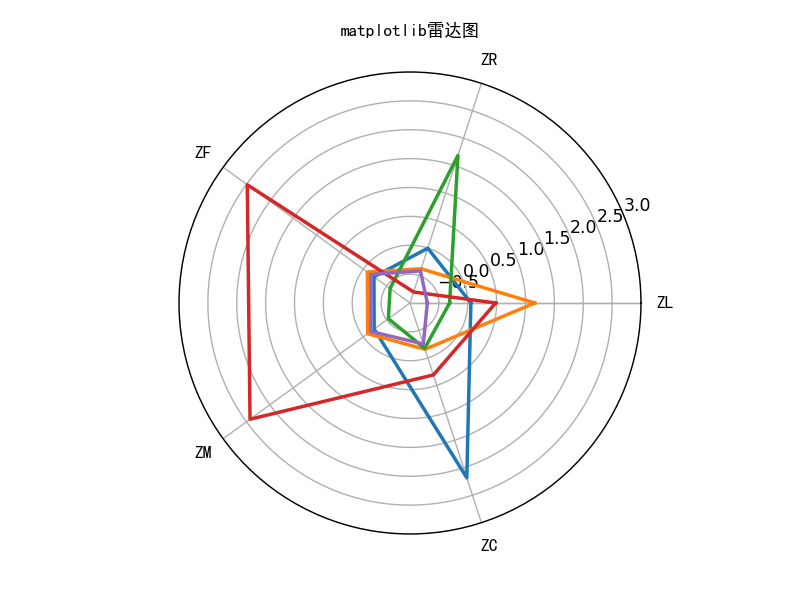

<function matplotlib.pyplot.show(*args, **kw)>

In [34]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
labels = np.array(['ZL', 'ZR', 'ZF', 'ZM', 'ZC'])
datalength = 5
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)  # polar参数
for i in range(5):
    data = kmodel.cluster_centers_[i]
    angles = np.linspace(0, 2*np.pi, datalength, endpoint=False)
    data = np.concatenate((data, [data[0]])) # 闭合
    angles = np.concatenate((angles, [angles[0]]))  # 闭合
    ax.plot(angles, data, linewidth=2) # 画线
# ax.fill(angles, data, facecolor='r' alpha=0.25) # 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties='SimHei')
ax.set_title('matplotlib雷达图', va='bottom', fontproperties='SimHei')
ax.set_rlim(-1,3)
ax.grid(True)
plt.show